# Optimization

* In Deep Learning, we *train* models, updating them successively so that they get better and better as they see more and more training data.
   * *Optimization*: the process of fitting our models to observed data
   * To understand optimization problems and methods, we need to know basic concepts from *Calculus*.


## Recap from last week

* Estimate blood pressure from height, weight, age, exerc_hours

In [1]:
%matplotlib inline

# input_data X: [height, weight, age, exerc_hours]
X = [[180, 89, 35, 1],
     [160, 49, 40, 4],
     [179, 69, 20, 2]];

# ground truth values Y: blood_pressure
Y = [[160], [130], [110]];

* If the model parameters are known:

In [2]:
# model w: w = [w0, w1, w2, w3]
w = [0.3, 0.8, -0.4, 10];

def model(w, x):
    y_hat = w[0]*x[0]+w[1]*x[1]+w[2]*x[2]+w[3]*x[3]
    return y_hat

x0 = X[0]
y0_hat = model(w, x0)
print(y0_hat)

121.2


* If the model parameters are *unknown*, we can use ground truth labels to find them

$$loss= (y-\hat{y})^2$$

In [3]:
def loss(y, y_hat):
    return (y-y_hat)**2

y0 = Y[0][0]
print(loss(y0, y0_hat))

1505.4399999999998


* The update for the first parameter $w[0]$ is given by:
$$w[0] \leftarrow w[0] - \frac{\theta loss}{\theta w[0]}$$
* In this lecture, we will see what $\frac{\theta loss}{\theta w[0]}$ is all about.
* For that, we need to know basic concepts from *Calculus*.

# Functions
* In maths, functions are similar to functions in programming
* Given a set of input values, a function can be used to compute an output

In [4]:
# Python:
def f(w, x):
    y = w[0]*x[0]+w[1]*x[1]+w[2]*x[2]+w[3]*x[3]
    return y

* Maths: $$ y = f(w_0, w_1, w_2, w_3, x_0, x_1, x_2, x_3)\\ y = w_0 \cdot x_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3$$
* The above function has 8 input variables. 
* Let's assume for simplicity a single variable function: $y=f(x) \textrm{ where } f: \mathbb{R} \rightarrow \mathbb{R}$.
* Example: Define the function $f(x) = 3x^2-4x$.

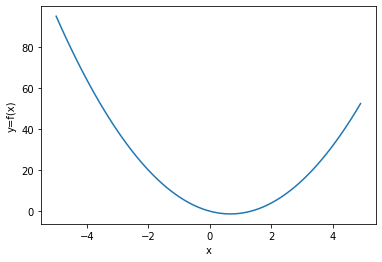

In [2]:
import torch 
from matplotlib import pyplot as plt
%matplotlib inline

def f(x):
    return 3 * x ** 2 - 4 * x

x = torch.arange(-5, 5, 0.1)
y = f(x)
plt.plot(x,y);
plt.xlabel('x'); plt.ylabel('y=f(x)'); 

# Derivatives and Differentiation

* Suppose that we have a function $f: \mathbb{R} \rightarrow \mathbb{R}$, whose input and output are both scalars. The *derivative* of $f$ is defined as:
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h},$$
if this limit exists. 

* We can interpret the derivative $f'(x)$ as the *instantaneous* rate of change of $f(x)$ with respect to $x$.



* Example: Consider again the function $f(x) = 3x^2-4x$. For $x=1$ and by letting $h$ approach $0$, the derivative $f'(x)$ is getting equal to $2$.

In [3]:
%matplotlib inline

def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


* If $f$ is differentiable at every number of an interval, then this function is differentiable on this interval.
* This also means that the derivative is also a function.
* For example the derivative of $f(x) = 3x^2-4x$ is also function $f'(x) = 6x-4$.


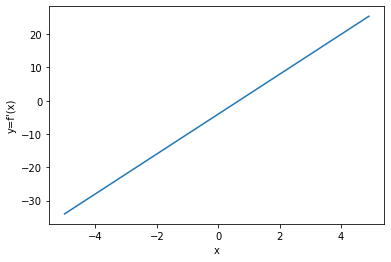

In [4]:
def f_prime(x):
    return 6 * x - 4

x = torch.arange(-5, 5, 0.1)
plt.plot(x,f_prime(x));
plt.xlabel('x'); plt.ylabel("y=f'(x)"); 

# Differentiation rules

* Given $y = f(x)$, the following expressions are equivalent:

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

where symbols $\frac{d}{dx}$ and $D$ are *differentiation operators* that indicate operation of *differentiation*.

* Differentiation results of commonly-used functions:
    * $DC = 0$ ($C$ is a constant),
    * $Dx^n = nx^{n-1}$ (the *power rule*, $n$ is any real number),
    * $De^x = e^x$,
    * $D\ln(x) = 1/x.$
    
* The above results are just examples: there are many more functions for which the derivatives are readily available.     

* Suppose that functions $f$ and $g$ are both differentiable and $C$ is a constant,
we have: 
    * the *constant multiple rule*
    
    $$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$
    
    * the *sum rule*

    $$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

    * the *product rule*

    $$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

    * and the *quotient rule*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

* Now we can apply a few of the above rules to find $f'(x) = 3 \frac{d}{dx} x^2-4\frac{d}{dx}x = 6x-4$. Thus, by setting $x = 1$, we have $f'(1) = 2$.

# Visualization

* This derivative is also the slope of the tangent line to the curve $f(x)$ when $x = 1$.

![derivative as slope of tangent line.](img/derivative_example3.png) 

<!-- ![derivative as slope of tangent line.](https://drive.google.com/uc?export=view&id=1QwpZpy-SGuDAWPF_uvpq7S5GRjZ-BmEc) -->


# Partial Derivatives

* So far we have dealt with the differentiation of functions of just one variable. 
* In deep learning, functions often depend on *many* variables. Thus, we need to extend the ideas of differentiation to these *multivariate* functions.

* Let $y = f(x_1, x_2, \ldots, x_n)$ be a function with $n$ variables. 
* Function f takes the $n$ variables $x_1, x_2, \ldots, x_n$ and maps them to a single number, i.e. y is *scalar*. 
* Equivalently, we can write $y=f(\mathbf{x})$ where $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ is the $n$-dimensional vector containing the input variables. 
* Example from above: $$y = w_0 \cdot x_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3$$


* The *partial derivative* of $y$ with respect to its $i^\mathrm{th}$  parameter $x_i$ is:

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

* To calculate $\frac{\partial y}{\partial x_i}$, we can simply treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants and calculate the derivative of $y$ with respect to $x_i$.

* In terms of notation of partial derivatives, the following are equivalent:

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

# Gradients

* We can concatenate partial derivatives of a multivariate function $f(\mathbf{x})$ with respect to all its input variables to obtain the *gradient* vector of the function.

* The gradient of the function $f(\mathbf{x})$ with respect to $\mathbf{x}$ is a vector of $n$ partial derivatives:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$
where $\nabla_{\mathbf{x}} f(\mathbf{x})$ is often replaced by $\nabla f(\mathbf{x})$ when there is no ambiguity.



# Differentiation results of commonly-used multivariate functions

The following results are often used when differentiating multivariate functions:

* $$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$$

* $$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$$

* $$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$$

* $$\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$$


# Chain Rule

* In Deep Learning, the multivariate functions used are often *composite*, so the above rules cannot be directly applied.
* Fortunately, the *chain rule* enables the differentiatiation of composite functions.

* Let us first consider functions of a single variable. Suppose that functions $y=f(u)$ and $u=g(x)$ are both differentiable, then the chain rule states that

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

* Suppose now that the differentiable function $y$ has variables $u_1, u_2, \ldots, u_m$, where each differentiable function $u_i$ has variables $x_1, x_2, \ldots, x_n$. Note that $y$ is a function of $x_1, x_2, \ldots, x_n$.

* Then, the chain rule gives
$$\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}$$
for any $i = 1, 2, \ldots, n$.

# Automatic Differentiation

* Differentiation is a crucial step in nearly all deep learning optimization algorithms.
* While the calculations for taking these derivatives is doable, for complex models, working out the calculations by hand can be a pain (and often error-prone).

* Deep learning frameworks overcome this problem by automatically calculating derivatives, by *automatic differentiation*.

* Given a model the system builds a *computational graph*, tracking which data combined through which operations to produce the output.

* Automatic differentiation enables the system to subsequently calculate gradients.




# A Simple Example

* Differentiate function $y = 2\mathbf{x}^{\top}\mathbf{x}$ with respect to the column vector $\mathbf{x}$.
* Note that, in practice, AD allows the calculation of the derivative for a specific value of the input variable.
* It does not provide a general mathematical formula for the function derivative. 
    * Good news is that you never need the formula in practice.
* For example consider the function $f(x) = 3x^2-4x$. We know that its derivative is $f'(x) = 6x-4$. AD will not give you access to this formula. It will give you access to values of $f'(x)$ for specific input values of $x$, e.g. $f'(1)=f'(x)$ for $x=1$, $f'(10)=f'(x)$ for $x=10$ etc.

In [2]:
import torch
# create a specific value of input x
x = torch.arange(4.0)
x.requires_grad_(True)
print(x)
print(x.grad)
y = 2*torch.dot(x, x)
print(y)

tensor([0., 1., 2., 3.], requires_grad=True)
None
tensor(28., grad_fn=<MulBackward0>)


* Next, we can automatically calculate the gradient of `y` with respect to each component of `x` by calling the function for gradient calculation and printing the gradient.
* This function is called **backpropagation**

In [3]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

* The gradient of the function $y = 2\mathbf{x}^{\top}\mathbf{x}$ with respect to $\mathbf{x}$ should be $4\mathbf{x}$.
* Let us quickly verify that our desired gradient was calculated correctly.



In [4]:
x.grad == 4 * x

tensor([True, True, True, True])

In [5]:
# Another example y = h(x) = x1+x2+x3+x4
# PyTorch accumulates the gradient in default, we need to clear the previous 
# values
x.grad.zero_() 
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [6]:
# output y must be always scalar
x.grad.zero_() 
y = x * x
y.backward() # will throw an error
x.grad

RuntimeError: ignored

# Detaching Computation

* Sometimes, we wish to move some calculations outside of the recorded computational graph.
* Example: consider $f(x) = 2\mathbf{x}^{\top}\mathbf{x}$ and then function $g(x)=(f(x)-\alpha)^2$ where $\alpha$ is a constant. Let's asssume $\alpha=2$.

In [7]:
# create a specific value of input x
x = torch.arange(4.0)
x.requires_grad_(True)
f = 2*torch.dot(x, x)
a = 2
g = (f-a)**2
g.backward()
print(x.grad)

tensor([  0., 208., 416., 624.])


* Now consider the case where $\alpha = x_1+ x_2 + x_3 + x_4$
* If we want $\alpha$ to be treated as constant i.e. $\alpha=0+1+2+3=6$ then we must *detach* $\alpha$ from the graph!
* Otherwise it will be considered a function of input $\mathbf{x}$!

In [8]:
x = torch.arange(4.0)
x.requires_grad_(True)
f = 2*torch.dot(x, x)
a = x.sum().detach() #equivalent to a = 6
#a = x.sum() # here a is a function of x
g = (f-a)**2
g.backward()
print(x.grad)

tensor([  0., 176., 352., 528.])


In [9]:
x = torch.arange(4.0)
x.requires_grad_(True)
f = 2*torch.dot(x, x)
#a = x.sum().detach() #equivalent to a = 6
a = x.sum() # here a is a function of x
g = (f-a)**2
g.backward()
print(x.grad)

tensor([-44., 132., 308., 484.])


# De-activating the autograd engine

* If you want to avoid calculating gradients, you can use torch.no_grad() to de-activate the autograd engine.
* This will reduce memory usage and speed up computations but you won’t be able to backprop (which you don’t want in an eval script).

In [6]:
x = torch.arange(4.0)
x.requires_grad_(True)
with torch.no_grad():
    f = 2*torch.dot(x, x)
print(f) # the forward pass i.e. the value of f is calculated as normal
f.backward() # the backward pass will throw an error

tensor(28.)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

# Summary

* A derivative can be interpreted as the instantaneous rate of change of a function with respect to its variable. 
* It is also the slope of the tangent line to the curve of the function.
* A gradient is a vector whose components are the partial derivatives of a multivariate function with respect to all its variables.
* The chain rule enables us to differentiate composite functions.
* Deep learning frameworks overcome this problem by automatically calculating derivatives, by *automatic differentiation*.
* Automatic differentiation enables the system to subsequently calculate gradients.


In [9]:
# Another example
# Input feature vector x with 10 features
x = torch.rand(10, 1)
x.requires_grad_(True)
# From x we want to learn to predict 5 values stored in output vector y
y = torch.rand(5, 1)
#print(y)
# Our model is a matrix W with 5 rows and 10 columns. 
W = torch.rand(5, 10)
W.requires_grad_(True)
# Each row of the model will be multiplied with x giving a single output. Overall the model produces 5 outputs.
# The model's predictions are y_hat = W*x which is 5-dim vector
y_hat = torch.mm(W, x) #also can use: y_hat = W@x
#print(y_hat)
# To improve the model we must make y_hat close to y  
# We can minimize the distance between y_hat and y using the (squared) L2 norm
L = ((y_hat-y)**2).sum()
# L is a multivariable function like the ones we saw above! 
# It depends on both x=(x1,...,x10) and W=(w11,...,w5,10)
# For this specific input and model parameters the value is:
print(L)
# To update the model, we need to update model parameters wij.
# To update w11 we need to calculate ThetaL/Thetaw11. 
# ThetaL/Thetaw11 in general is also a function of both x=(x1,...,x10) and W=(w11,...,w5,10). 
# We need to evaluate it for a given input x, current model parameters, outputs y and y_hat.
# Then wij_new = wij_new - ThetaL/Thetawij

tensor(32.7998, grad_fn=<SumBackward0>)


In [10]:
x.data, x.grad

(tensor([[0.3663],
         [0.4006],
         [0.0853],
         [0.7513],
         [0.3562],
         [0.4861],
         [0.2470],
         [0.5803],
         [0.8117],
         [0.8044]]), None)

In [11]:
W.data, W.grad

(tensor([[0.3205, 0.5586, 0.3583, 0.6945, 0.3542, 0.8456, 0.3758, 0.8280, 0.0752,
          0.0609],
         [0.9842, 0.7040, 0.4851, 0.3832, 0.8733, 0.8766, 0.2195, 0.9017, 0.8032,
          0.4650],
         [0.1897, 0.0332, 0.8849, 0.4892, 0.1550, 0.5171, 0.9341, 0.8754, 0.0963,
          0.6587],
         [0.8442, 0.3705, 0.8403, 0.6849, 0.6666, 0.9858, 0.7914, 0.1854, 0.7960,
          0.7480],
         [0.6566, 0.4023, 0.2218, 0.6762, 0.0688, 0.6223, 0.8890, 0.9557, 0.9012,
          0.6282]]), None)

In [12]:
L.backward()

In [13]:
x.data, x.grad

(tensor([[0.3663],
         [0.4006],
         [0.0853],
         [0.7513],
         [0.3562],
         [0.4861],
         [0.2470],
         [0.5803],
         [0.8117],
         [0.8044]]), tensor([[16.3076],
         [10.8437],
         [13.8839],
         [14.8413],
         [11.2648],
         [19.7884],
         [16.2133],
         [18.4138],
         [15.0485],
         [13.4538]]))

In [14]:
W.data, W.grad

(tensor([[0.3205, 0.5586, 0.3583, 0.6945, 0.3542, 0.8456, 0.3758, 0.8280, 0.0752,
          0.0609],
         [0.9842, 0.7040, 0.4851, 0.3832, 0.8733, 0.8766, 0.2195, 0.9017, 0.8032,
          0.4650],
         [0.1897, 0.0332, 0.8849, 0.4892, 0.1550, 0.5171, 0.9341, 0.8754, 0.0963,
          0.6587],
         [0.8442, 0.3705, 0.8403, 0.6849, 0.6666, 0.9858, 0.7914, 0.1854, 0.7960,
          0.7480],
         [0.6566, 0.4023, 0.2218, 0.6762, 0.0688, 0.6223, 0.8890, 0.9557, 0.9012,
          0.6282]]),
 tensor([[1.5049, 1.6456, 0.3502, 3.0863, 1.4630, 1.9970, 1.0149, 2.3838, 3.3345,
          3.3043],
         [2.0344, 2.2245, 0.4734, 4.1721, 1.9778, 2.6996, 1.3719, 3.2225, 4.5077,
          4.4669],
         [1.4295, 1.5631, 0.3327, 2.9317, 1.3898, 1.8969, 0.9640, 2.2644, 3.1675,
          3.1388],
         [2.1762, 2.3796, 0.5065, 4.4630, 2.1157, 2.8878, 1.4676, 3.4472, 4.8220,
          4.7783],
         [2.1036, 2.3002, 0.4896, 4.3141, 2.0451, 2.7914, 1.4186, 3.3322, 4.6611,
       